# Radix Sort - CUDA Strong Scaling and Speedup

In [1]:
# Jonathan Kutsch
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("/scratch/user/jonathankutsch/cudaradix/cudaradix/build/*.cali"))
# dataframes
tk.dataframe = tk.dataframe.drop(["spot.channel"], axis=1)
tk.dataframe = tk.dataframe.drop(["Min time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Avg time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total time"],axis=1)
tk.dataframe = tk.dataframe.drop(["Min GPU Time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max GPU Time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total GPU Time"],axis=1)
tk.dataframe = tk.dataframe.drop(["nid"],axis=1)

In [3]:
# Performance data
tk.dataframe

Avg GPU Time/rank  \
node                                              profile                         
{'name': 'comm_small', 'type': 'function'}        61375466                  NaN   
                                                  99015544                  NaN   
                                                  160559518                 NaN   
                                                  166230488                 NaN   
                                                  221758704                 NaN   
                                                  313732938                 NaN   
                                                  333125538                 NaN   
                                                  399664357                 NaN   
                                                  413878230                 NaN   
                                                  433466550                 NaN   
                                                  436588846                 NaN   
                                                  470131166                 NaN   
                                                  503965809                 NaN   
                                                  570708261                 NaN   
                                                  577075222                 NaN   
                                                  605284093                 NaN   
                                                  618265817                 NaN   
                                                  633345113                 NaN   
                                                  719889068                 NaN   
                                                  801823338                 NaN   
                                                  837796429                 NaN   
                                                  1014261533                NaN   
                                                  1020665575                NaN   
                                                  1110787370                NaN   
                                                  1153747557                NaN   
                                                  1264413114                NaN   
                                                  1324288638                NaN   
                                                  1348955158                NaN   
                                                  1622579948                NaN   
                                                  1678096148                NaN   
                                                  1764563284                NaN   
                                                  1896670274                NaN   
                                                  1906822091                NaN   
                                                  1923967409                NaN   
                                                  1974367260                NaN   
                                                  2033457094                NaN   
                                                  2053396208                NaN   
                                                  2121460026                NaN   
                                                  2155313965                NaN   
                                                  2229542937                NaN   
                                                  2249518601                NaN   
                                                  2260046623                NaN   
                                                  2275871028                NaN   
                                                  2387610341                NaN   
                                                  2393167038                NaN   
                                                  2458763991                NaN   
                                                  2501972443                Na

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 comm_small
1.000 comp_small
1.000 whole_computation
├─ 1.000 comm
│  └─ 1.000 comm_large
├─ 1.000 comp
│  └─ 1.000 comp_large
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,
61375466,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,1701240600,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./cudaradix, 1048576, 64, 0]",g,Radix Sort,CUDA,int,4,1048576,Sorted,64,524288,9,Online
99015544,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,1701240660,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./cudaradix, 1048576, 512, 2]",g,Radix Sort,CUDA,int,4,1048576,ReverseSorted,512,524288,9,Online
160559518,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,1701240203,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./cudaradix, 65536, 128, 1]",g,Radix Sort,CUDA,int,4,65536,Random,128,32768,9,Online
166230488,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,1701241080,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./cudaradix, 4194304, 128, 0]",g,Radix Sort,CUDA,int,4,4194304,Sorted,128,2097152,9,Online
221758704,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,1701240256,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./cudaradix, 65536, 512, 2]",g,Radix Sort,CUDA,int,4,65536,ReverseSorted,512,32768,9,Online
313732938,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,1701240418,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./cudaradix, 262144, 512, 1]",g,Radix Sort,CUDA,int,4,262144,Random,512,131072,9,Online
333125538,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,1701241080,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./cudaradix, 4194304, 128, 2]",g,Radix Sort,CUDA,int,4,4194304,ReverseSorted,128,2097152,9,Online
399664357,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,1701241278,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./cudaradix, 4194304, 512, 3]",g,Radix Sort,CUDA,int,4,4194304,1%%perturbed,512,2097152,9,Online
413878230,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,1701241080,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./cudaradix, 4194304, 256, 0]",g,Radix Sort,CUDA,int,4,4194304,Sorted,256,2097152,9,Online


In [6]:
gb = tk.groupby(["InputType", "InputSize"])

16  thickets created...
{('1%%perturbed', 65536): <thicket.thicket.Thicket object at 0x2b6d2fae07c0>, ('1%%perturbed', 262144): <thicket.thicket.Thicket object at 0x2b6d2f988d90>, ('1%%perturbed', 1048576): <thicket.thicket.Thicket object at 0x2b6d2f90cbb0>, ('1%%perturbed', 4194304): <thicket.thicket.Thicket object at 0x2b6d2fa09760>, ('Random', 65536): <thicket.thicket.Thicket object at 0x2b6d2f9b3ac0>, ('Random', 262144): <thicket.thicket.Thicket object at 0x2b6d2fb11940>, ('Random', 1048576): <thicket.thicket.Thicket object at 0x2b6d2fa2f790>, ('Random', 4194304): <thicket.thicket.Thicket object at 0x2b6d2fb11eb0>, ('ReverseSorted', 65536): <thicket.thicket.Thicket object at 0x2b6d2fbaef10>, ('ReverseSorted', 262144): <thicket.thicket.Thicket object at 0x2b6d2faeb250>, ('ReverseSorted', 1048576): <thicket.thicket.Thicket object at 0x2b6d2fa7d070>, ('ReverseSorted', 4194304): <thicket.thicket.Thicket object at 0x2b6d2fabc550>, ('Sorted', 65536): <thicket.thicket.Thicket object at 0x

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [8]:
ctk.dataframe

(1%%perturbed, 65536)  \
                                                                  Avg GPU Time/rank   
node                                              num_threads                         
{'name': 'comm_small', 'type': 'function'}        64                            NaN   
                                                  128                           NaN   
                                                  256                           NaN   
                                                  512                           NaN   
                                                  1024                          NaN   
{'name': 'comp_small', 'type': 'function'}        64                            NaN   
                                                  128                           NaN   
                                                  256                           NaN   
                                                  512                           NaN   
                                                  1024                          NaN   
{'name': 'whole_computation', 'type': 'function'} 64                       1.882283   
                                                  128                      1.861880   
                                                  256                      1.827247   
                                                  512                      2.946074   
                                                  1024                     5.598539   
{'name': 'comm', 'type': 'function'}              64                       0.000046   
                                                  128                      0.000047   
                                                  256                      0.000045   
                                                  512                      0.000046   
                                                  1024                     0.000046   
{'name': 'comm_large', 'type': 'function'}        64                       0.000046   
                                                  128                      0.000047   
                                                  256                      0.000045   
                                                  512                      0.000046   
                                                  1024                     0.000046   
{'name': 'comp', 'type': 'function'}              64                       1.882237   
                                                  128                      1.861834   
                                                  256                      1.827202   
                                                  512                      2.946028   
                                                  1024                     5.598493   
{'name': 'comp_large', 'type': 'function'}        64                       1.882237   
                                                  128                      1.861834   
                                                  256                      1.827202   
                                                  512                      2.946028   
                                                  1024                     5.598493   
{'name': 'data_init', 'type': 'function'}         64                            NaN   
                                                  128                           NaN   
                                                  256                           NaN   
                                                  512                           NaN   
                                                  1024                          NaN   

                                                              (1%%perturbed, 262144)  \
                                                                   Avg GPU Time/rank   
node                                              num_threads                          
{'name': 'comm_small', 'type': 'function'}        64    

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
# Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (("1%%perturbed",65536), "nid"), (("1%%perturbed",65536),"Min time/rank"), (("1%%perturbed",65536),"Max time/rank"), (("1%%perturbed",65536),"Total time"), (("1%%perturbed",65536),"Variance time/rank"), (("Random",65536),"nid"), (("Random",65536),"Min time/rank"), (("Random",65536),"Max time/rank"), (("Random",65536),"Total time"), (("Random",65536),"Variance time/rank"),(("Sorted",65536),"nid"),(("Sorted",65536),"Min time/rank"), (("Sorted",65536),"Max time/rank"), (("Sorted",65536),"Total time"), (("Sorted",65536),"Variance time/rank"),(("ReverseSorted",65536),"nid"),(("ReverseSorted",65536),"Min time/rank"), (("ReverseSorted",65536),"Max time/rank"), (("ReverseSorted",65536),"Total time"), (("ReverseSorted",65536),"Variance time/rank") ], axis=1)
# ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",262144), "nid"), (("1%%perturbed",262144),"Min time/rank"), (("1%%perturbed",262144),"Max time/rank"), (("1%%perturbed",262144),"Total time"), (("1%%perturbed",262144),"Variance time/rank"), (("Random",262144),"nid"), (("Random",262144),"Min time/rank"), (("Random",262144),"Max time/rank"), (("Random",262144),"Total time"), (("Random",262144),"Variance time/rank"),(("Sorted",262144),"nid"),(("Sorted",262144),"Min time/rank"), (("Sorted",262144),"Max time/rank"), (("Sorted",262144),"Total time"), (("Sorted",262144),"Variance time/rank"),(("ReverseSorted",262144),"nid"),(("ReverseSorted",262144),"Min time/rank"), (("ReverseSorted",262144),"Max time/rank"), (("ReverseSorted",262144),"Total time"), (("ReverseSorted",262144),"Variance time/rank") ], axis=1)
# ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",1048576), "nid"), (("1%%perturbed",1048576),"Min time/rank"), (("1%%perturbed",1048576),"Max time/rank"), (("1%%perturbed",1048576),"Total time"), (("1%%perturbed",1048576),"Variance time/rank"), (("Random",1048576),"nid"), (("Random",1048576),"Min time/rank"), (("Random",1048576),"Max time/rank"), (("Random",1048576),"Total time"), (("Random",1048576),"Variance time/rank"),(("Sorted",1048576),"nid"),(("Sorted",1048576),"Min time/rank"), (("Sorted",1048576),"Max time/rank"), (("Sorted",1048576),"Total time"), (("Sorted",1048576),"Variance time/rank"),(("ReverseSorted",1048576),"nid"),(("ReverseSorted",1048576),"Min time/rank"), (("ReverseSorted",1048576),"Max time/rank"), (("ReverseSorted",1048576),"Total time"), (("ReverseSorted",1048576),"Variance time/rank") ], axis=1)
# ctk.dataframe = ctk.dataframe.drop([("index","")], axis=1)

ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

In [10]:
ctk.dataframe

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                                  Avg GPU Time/rank      Avg GPU Time/rank   
name              num_threads                                                
comm_small        64                            NaN                    NaN   
                  128                           NaN                    NaN   
                  256                           NaN                    NaN   
                  512                           NaN                    NaN   
                  1024                          NaN                    NaN   
comp_small        64                            NaN                    NaN   
                  128                           NaN                    NaN   
                  256                           NaN                    NaN   
                  512                           NaN                    NaN   
                  1024                          NaN                    NaN   
whole_computation 64                       1.882283              26.454925   
                  128                      1.861880              26.300888   
                  256                      1.827247              26.437322   
                  512                      2.946074              42.267530   
                  1024                     5.598539              87.593176   
comm              64                       0.000046               0.000170   
                  128                      0.000047               0.000172   
                  256                      0.000045               0.000172   
                  512                      0.000046               0.000170   
                  1024                     0.000046               0.000171   
comm_large        64                       0.000046               0.000170   
                  128                      0.000047               0.000172   
                  256                      0.000045               0.000172   
                  512                      0.000046               0.000170   
                  1024                     0.000046               0.000171   
comp              64                       1.882237              26.454755   
                  128                      1.861834              26.300717   
                  256                      1.827202              26.437150   
                  512                      2.946028              42.267360   
                  1024                     5.598493              87.593004   
comp_large        64                       1.882237              26.454755   
                  128                      1.861834              26.300717   
                  256                      1.827202              26.437150   
                  512                      2.946028              42.267360   
                  1024                     5.598493              87.593004   
data_init         64                            NaN                    NaN   
                  128                           NaN                    NaN   
                  256                           NaN                    NaN   
                  512                           NaN                    NaN   
                  1024                          NaN                    NaN   

                              (1%%perturbed, 1048576) (1%%perturbed, 4194304)  \
                                    Avg GPU Time/rank       Avg GPU Time/rank   
name              num_threads                                                   
comm_small        64                              NaN                     NaN   
                  128                             NaN                     NaN   
                  256                             NaN                     NaN   
                  512                             NaN                     NaN   
                  1024                            NaN                     NaN   
comp_small        64       

In [11]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
inputsizes = sorted(list(set(tk.metadata["InputSize"].to_list())))
inputtypes = sorted(list(set(tk.metadata["InputType"].to_list())))

In [12]:
ctk.dataframe

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                                  Avg GPU Time/rank      Avg GPU Time/rank   
name              num_threads                                                
comm_small        64                            NaN                    NaN   
                  128                           NaN                    NaN   
                  256                           NaN                    NaN   
                  512                           NaN                    NaN   
                  1024                          NaN                    NaN   
comp_small        64                            NaN                    NaN   
                  128                           NaN                    NaN   
                  256                           NaN                    NaN   
                  512                           NaN                    NaN   
                  1024                          NaN                    NaN   
whole_computation 64                       1.882283              26.454925   
                  128                      1.861880              26.300888   
                  256                      1.827247              26.437322   
                  512                      2.946074              42.267530   
                  1024                     5.598539              87.593176   
comm              64                       0.000046               0.000170   
                  128                      0.000047               0.000172   
                  256                      0.000045               0.000172   
                  512                      0.000046               0.000170   
                  1024                     0.000046               0.000171   
comm_large        64                       0.000046               0.000170   
                  128                      0.000047               0.000172   
                  256                      0.000045               0.000172   
                  512                      0.000046               0.000170   
                  1024                     0.000046               0.000171   
comp              64                       1.882237              26.454755   
                  128                      1.861834              26.300717   
                  256                      1.827202              26.437150   
                  512                      2.946028              42.267360   
                  1024                     5.598493              87.593004   
comp_large        64                       1.882237              26.454755   
                  128                      1.861834              26.300717   
                  256                      1.827202              26.437150   
                  512                      2.946028              42.267360   
                  1024                     5.598493              87.593004   
data_init         64                            NaN                    NaN   
                  128                           NaN                    NaN   
                  256                           NaN                    NaN   
                  512                           NaN                    NaN   
                  1024                          NaN                    NaN   

                              (1%%perturbed, 1048576) (1%%perturbed, 4194304)  \
                                    Avg GPU Time/rank       Avg GPU Time/rank   
name              num_threads                                                   
comm_small        64                              NaN                     NaN   
                  128                             NaN                     NaN   
                  256                             NaN                     NaN   
                  512                             NaN                     NaN   
                  1024                            NaN                     NaN   
comp_small        64       

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [13]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    legend = plot.legend(loc='upper center', fontsize='x-small')
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=2)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Graphs

### Strong Scaling

In [15]:
ctk.dataframe.loc["whole_computation"]

,"(1%%perturbed, 65536)","(1%%perturbed, 262144)","(1%%perturbed, 1048576)","(1%%perturbed, 4194304)","(Random, 65536)","(Random, 262144)","(Random, 1048576)","(Random, 4194304)","(ReverseSorted, 65536)","(ReverseSorted, 262144)","(ReverseSorted, 1048576)","(ReverseSorted, 4194304)","(Sorted, 65536)","(Sorted, 262144)","(Sorted, 1048576)","(Sorted, 4194304)"
,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank,Avg GPU Time/rank
num_threads,,,,,,,,,,,,,,,,
64,1.882283,26.454925,410.915641,6529.705408,1.860589,26.464838,410.898632,6528.479313,1.845646,26.542400,411.407228,6531.069777,1.797389,26.390176,410.511113,6527.239133
128,1.861880,26.300888,410.460547,6527.113583,1.893992,26.345703,410.467443,6527.035717,1.801305,26.287930,410.643391,6528.581084,1.867423,26.303996,410.358842,6526.746511
256,1.827247,26.437322,410.677848,6528.279287,1.857985,26.430769,410.963630,6529.132938,1.894198,26.480019,411.037529,6529.187501,1.849603,26.421962,410.724782,6528.475059
512,2.946074,42.267530,670.101846,10572.847292,2.873488,42.367401,663.084258,10571.456987,3.064760,45.479853,711.141846,NaN,2.587644,38.023752,596.846227,9475.206814
1024,5.598539,87.593176,1372.320510,NaN,5.703598,87.608814,1374.942440,NaN,6.139180,93.390871,1479.257481,NaN,5.061133,77.370315,1207.230367,NaN


In [16]:
# ctk.dataframe.columns.get_level_values(0)

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


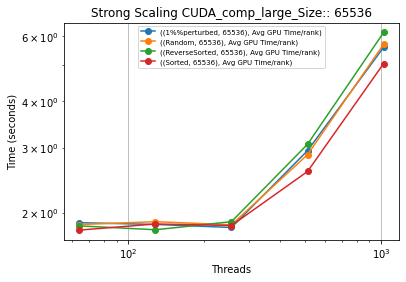

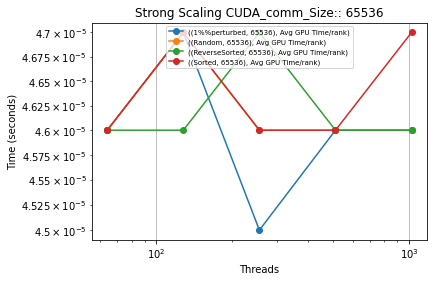

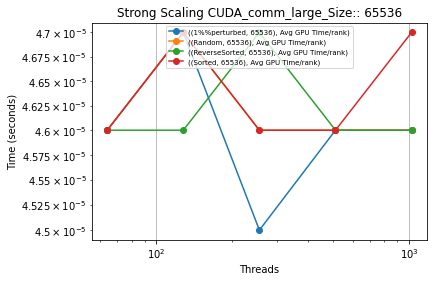

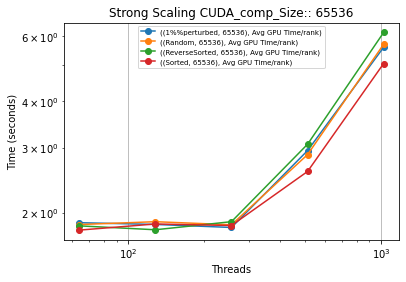

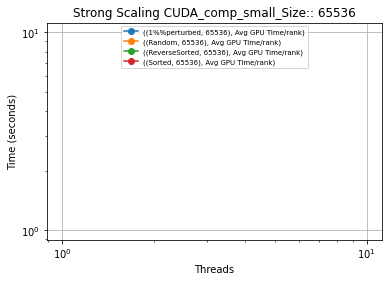

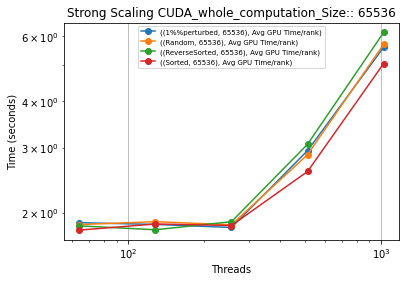

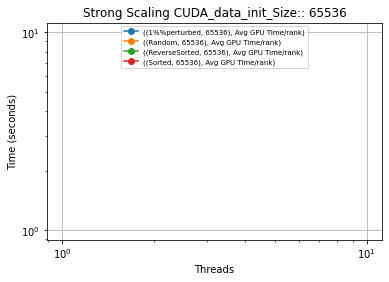

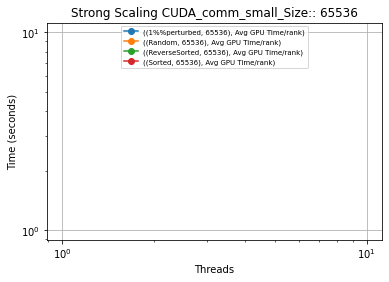

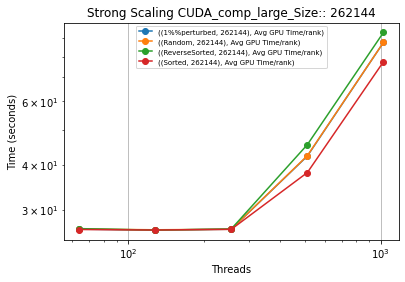

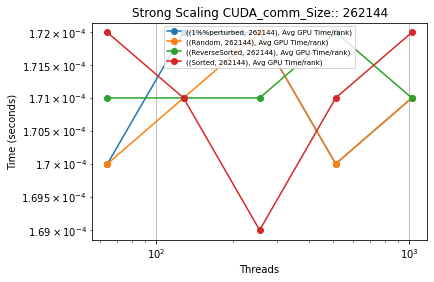

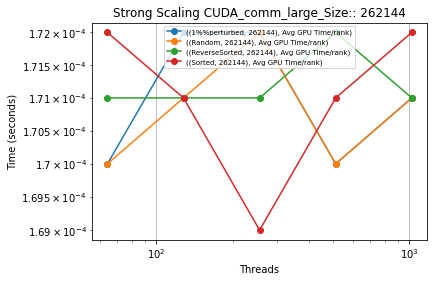

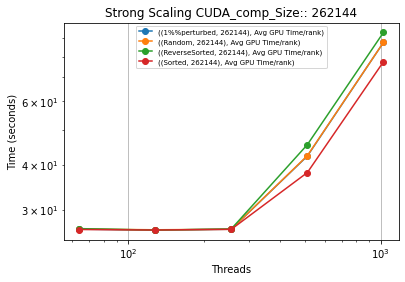

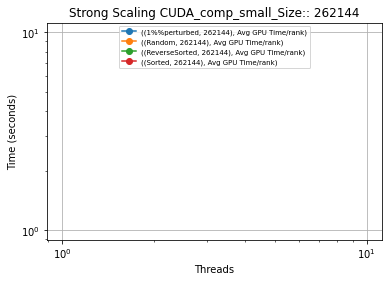

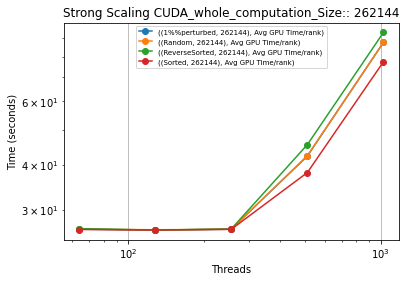

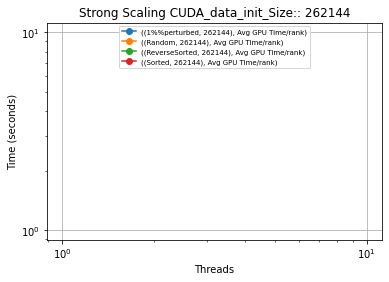

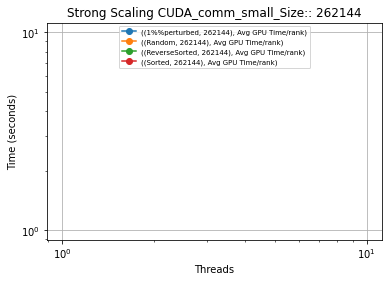

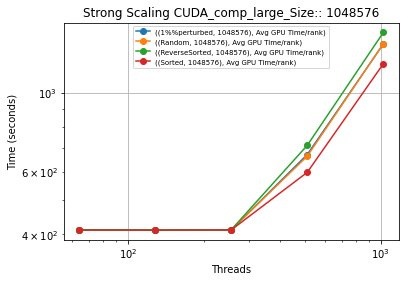

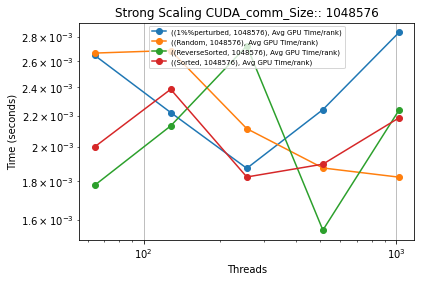

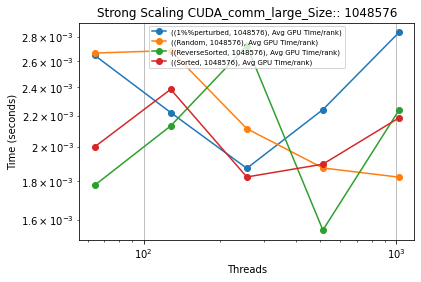

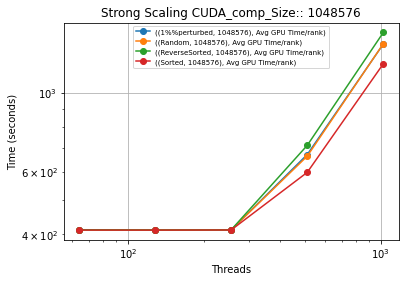

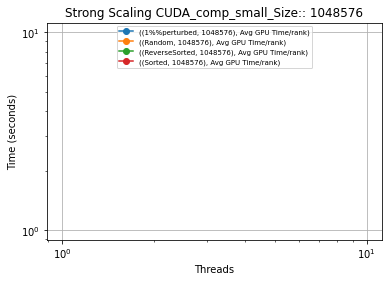

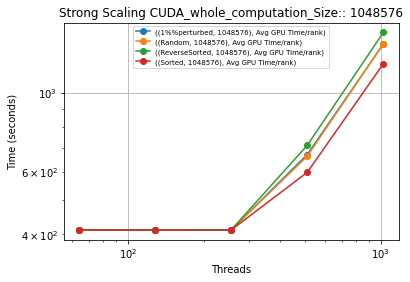

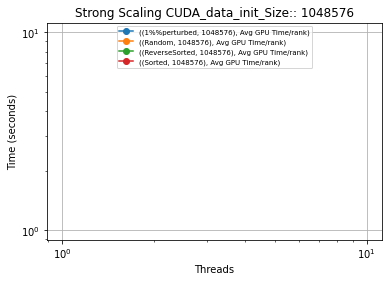

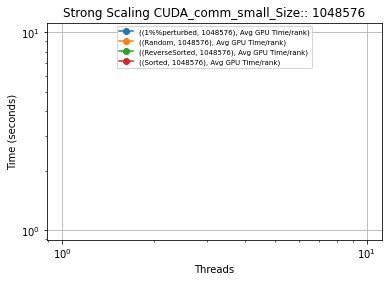

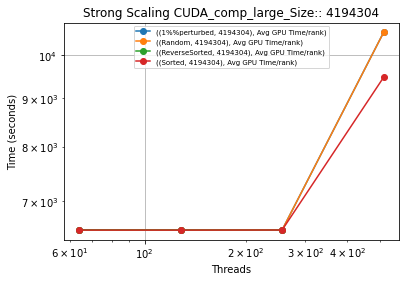

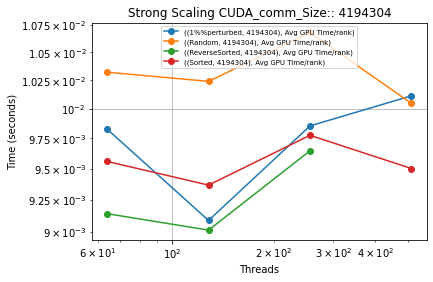

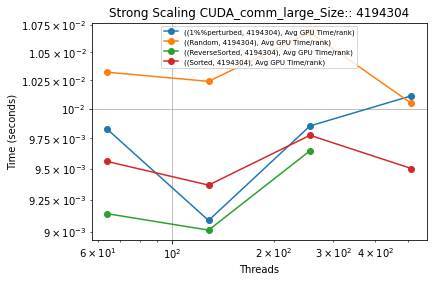

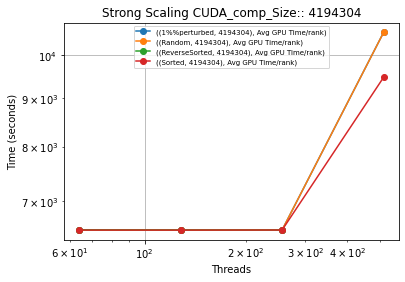

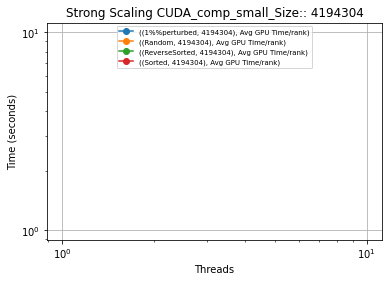

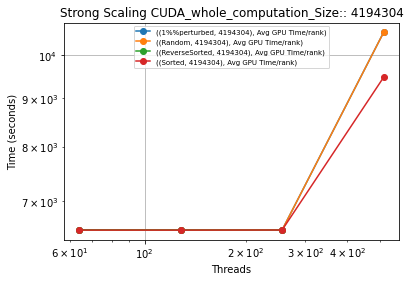

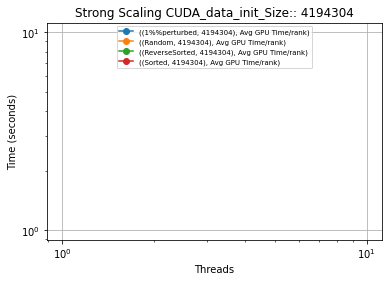

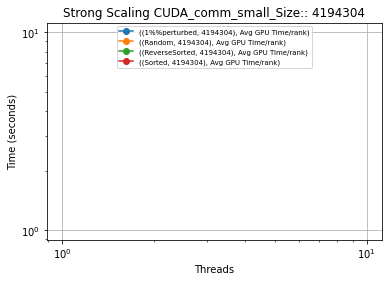

In [17]:
#Plotting Strong Scaling
for size in inputsizes:
    cols = [(inputtype, "Avg GPU Time/rank") for inputtype in ctk.dataframe.columns.get_level_values(0) if inputtype[1] == size]
    test = ctk.dataframe[cols]
    for name in function_names:
        plot = plot_pandas(
            df=test.loc[name],
            title=f"Strong Scaling CUDA_{name}_Size:: {size}",
            xlabel="Threads",
            ylabel="Time (seconds)",
            loglog=True
        )
        fig = plot.get_figure()
        fig.savefig(f"Strong Scaling CUDA_{name}_Size:: {size}.png")


In [18]:
#Strong Scaling Speedup

In [19]:
ctk.dataframe.loc[("whole_computation",64)]

(1%%perturbed, 65536)     Avg GPU Time/rank       1.882283
(1%%perturbed, 262144)    Avg GPU Time/rank      26.454925
(1%%perturbed, 1048576)   Avg GPU Time/rank     410.915641
(1%%perturbed, 4194304)   Avg GPU Time/rank    6529.705408
(Random, 65536)           Avg GPU Time/rank       1.860589
(Random, 262144)          Avg GPU Time/rank      26.464838
(Random, 1048576)         Avg GPU Time/rank     410.898632
(Random, 4194304)         Avg GPU Time/rank    6528.479313
(ReverseSorted, 65536)    Avg GPU Time/rank       1.845646
(ReverseSorted, 262144)   Avg GPU Time/rank      26.542400
(ReverseSorted, 1048576)  Avg GPU Time/rank     411.407228
(ReverseSorted, 4194304)  Avg GPU Time/rank    6531.069777
(Sorted, 65536)           Avg GPU Time/rank       1.797389
(Sorted, 262144)          Avg GPU Time/rank      26.390176
(Sorted, 1048576)         Avg GPU Time/rank     410.511113
(Sorted, 4194304)         Avg GPU Time/rank    6527.239133
Name: (whole_computation, 64), dtype: float64

In [20]:
#Strong Scaling Speedup
speedup_df = ctk.dataframe.loc[("whole_computation",64)]/ctk.dataframe
speedup_df

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                                  Avg GPU Time/rank      Avg GPU Time/rank   
name              num_threads                                                
comm_small        64                            NaN                    NaN   
                  128                           NaN                    NaN   
                  256                           NaN                    NaN   
                  512                           NaN                    NaN   
                  1024                          NaN                    NaN   
comp_small        64                            NaN                    NaN   
                  128                           NaN                    NaN   
                  256                           NaN                    NaN   
                  512                           NaN                    NaN   
                  1024                          NaN                    NaN   
whole_computation 64                       1.000000               1.000000   
                  128                      1.010958               1.005857   
                  256                      1.030120               1.000666   
                  512                      0.638912               0.625892   
                  1024                     0.336210               0.302020   
comm              64                   40919.195652          155617.205882   
                  128                  40048.574468          153807.703488   
                  256                  41828.511111          153807.703488   
                  512                  40919.195652          155617.205882   
                  1024                 40919.195652          154707.163743   
comm_large        64                   40919.195652          155617.205882   
                  128                  40048.574468          153807.703488   
                  256                  41828.511111          153807.703488   
                  512                  40919.195652          155617.205882   
                  1024                 40919.195652          154707.163743   
comp              64                       1.000024               1.000006   
                  128                      1.010983               1.005863   
                  256                      1.030145               1.000672   
                  512                      0.638922               0.625895   
                  1024                     0.336212               0.302021   
comp_large        64                       1.000024               1.000006   
                  128                      1.010983               1.005863   
                  256                      1.030145               1.000672   
                  512                      0.638922               0.625895   
                  1024                     0.336212               0.302021   
data_init         64                            NaN                    NaN   
                  128                           NaN                    NaN   
                  256                           NaN                    NaN   
                  512                           NaN                    NaN   
                  1024                          NaN                    NaN   

                              (1%%perturbed, 1048576) (1%%perturbed, 4194304)  \
                                    Avg GPU Time/rank       Avg GPU Time/rank   
name              num_threads                                                   
comm_small        64                              NaN                     NaN   
                  128                             NaN                     NaN   
                  256                             NaN                     NaN   
                  512                             NaN                     NaN   
                  1024                            NaN                     NaN   
comp_small        64       

In [21]:
#[(inputsize, "Total time") for inputsize in speedup_df.columns.get_level_values(0) if inputsize[0] == intype]

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


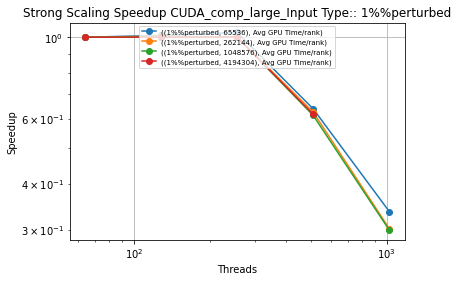

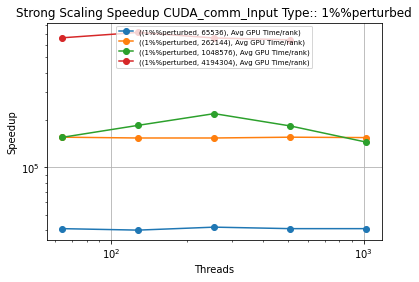

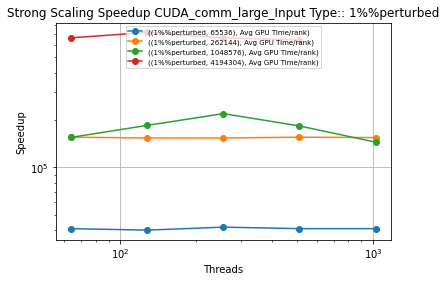

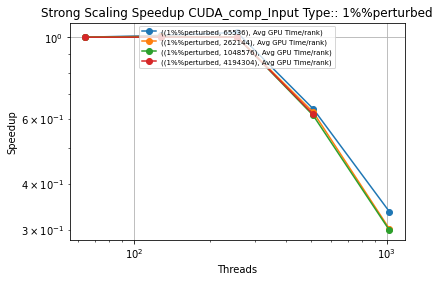

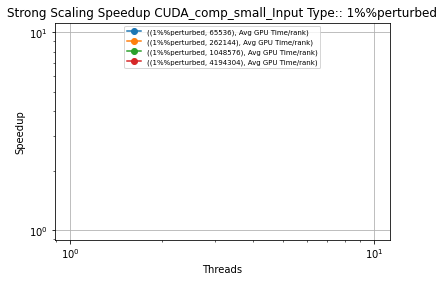

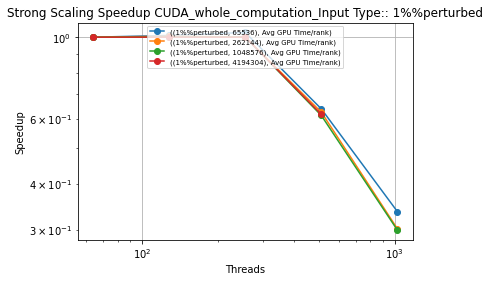

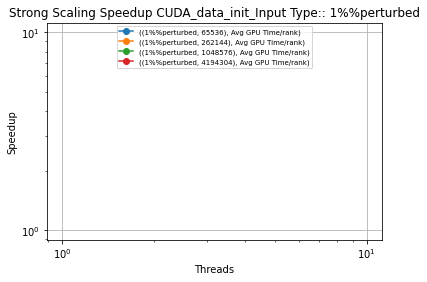

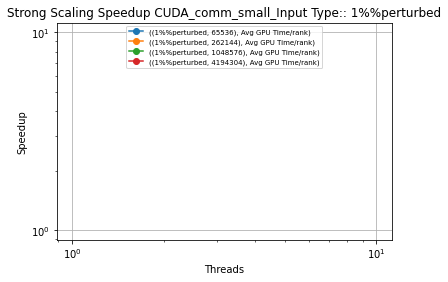

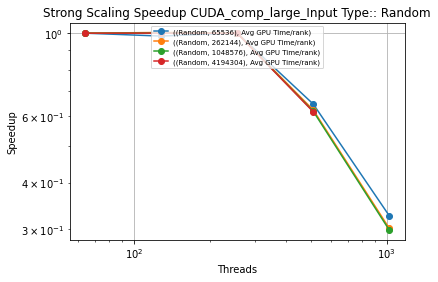

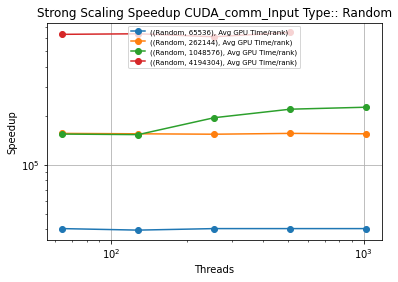

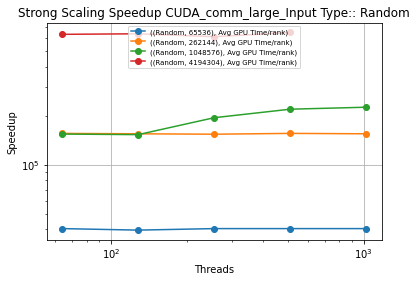

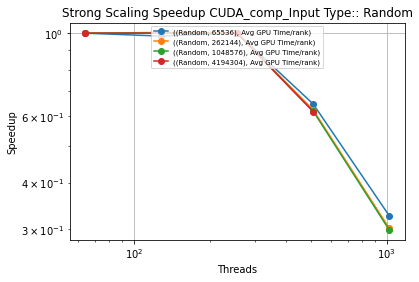

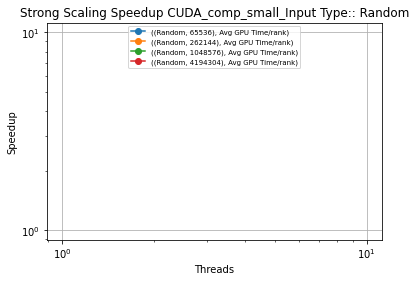

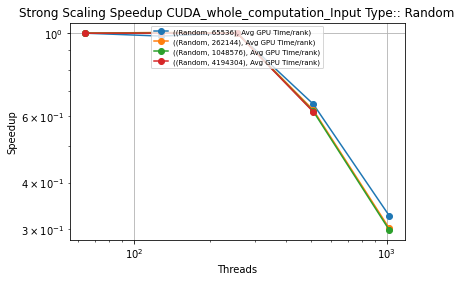

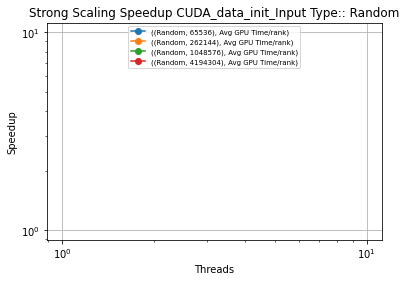

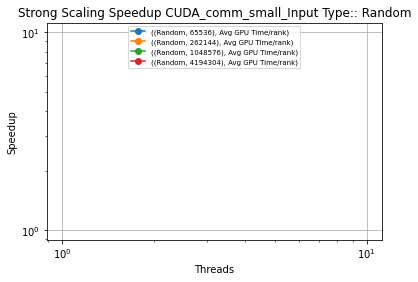

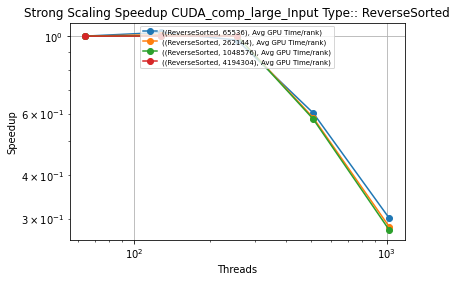

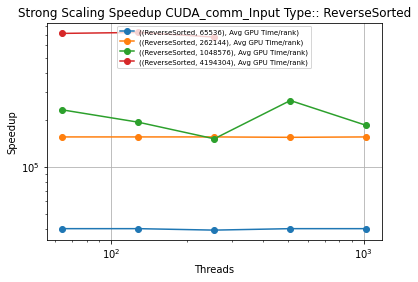

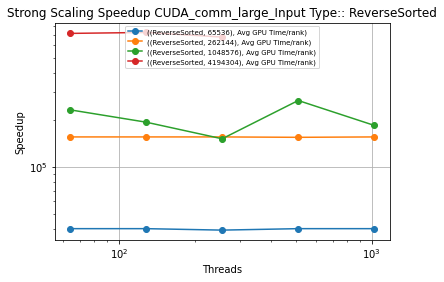

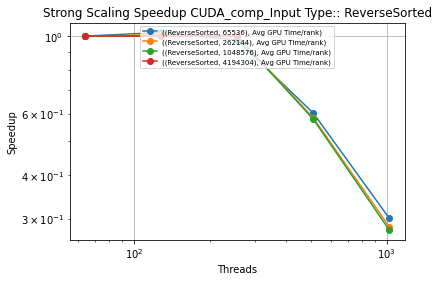

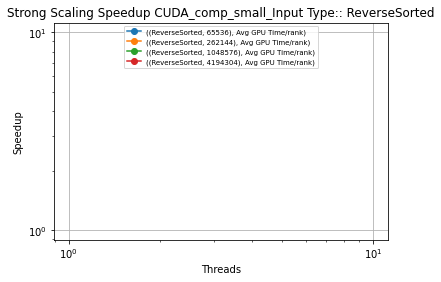

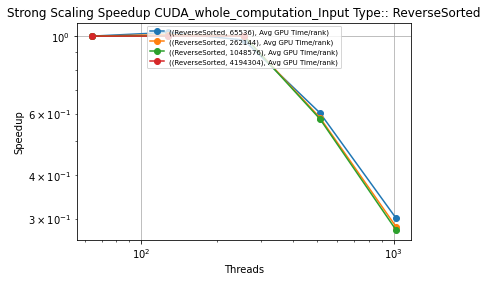

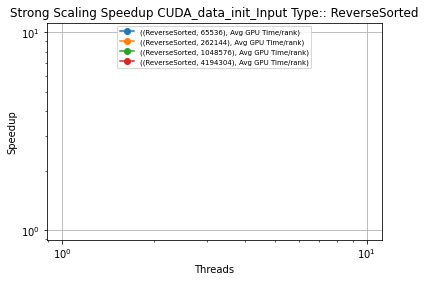

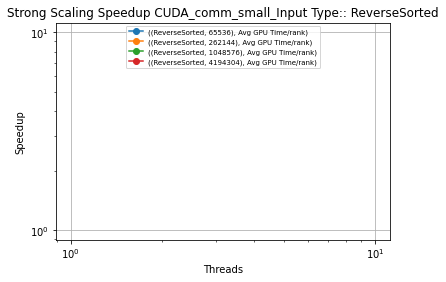

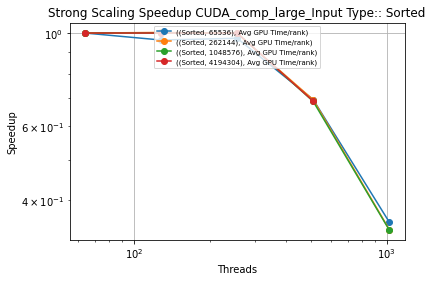

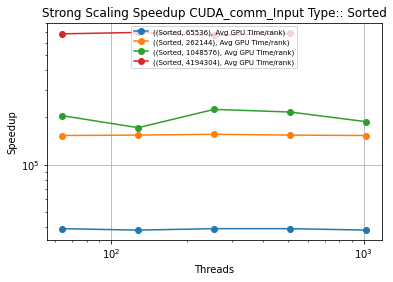

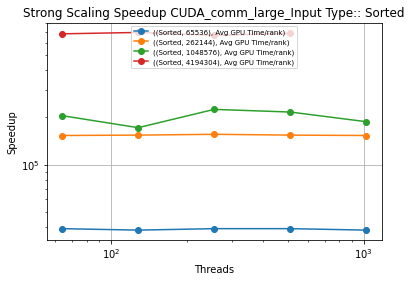

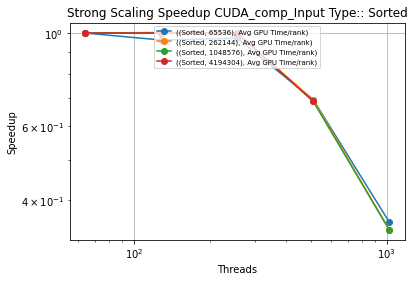

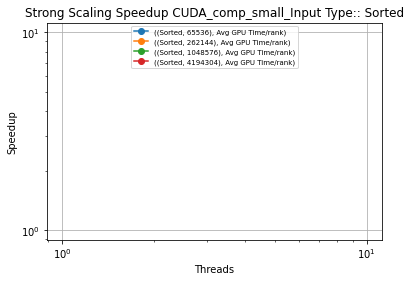

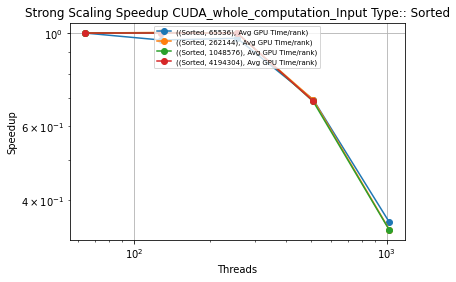

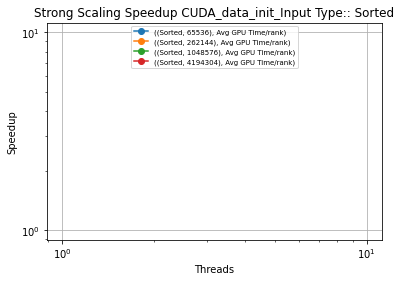

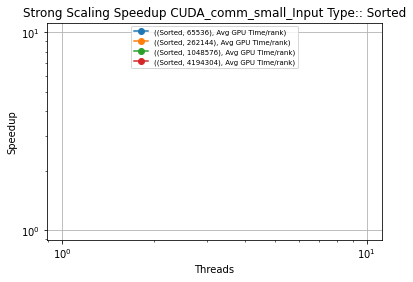

In [22]:
#Plotting Strong Scaling Speedup
for intype in inputtypes:
    cols = [(inputsize, "Avg GPU Time/rank") for inputsize in speedup_df.columns.get_level_values(0) if inputsize[0] == intype]
    test = speedup_df[cols]
    for name in function_names:
        plot = plot_pandas(
            df=test.loc[name],
            title=f"Strong Scaling Speedup CUDA_{name}_Input Type:: {intype}",
            xlabel="Threads",
            ylabel="Speedup",
            loglog=True
        )
        fig = plot.get_figure()
        fig.savefig(f"Strong Scaling Speedup CUDA_{name}_Input Type:: {intype}.png")
